In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/English_Language_Arts__ELA__Test_Results_2013-2023_20240501.csv")

In [3]:
df.columns

Index(['Report Category', 'Geographic Subdivision', 'School Name', 'Grade',
       'Year', 'Student Category', 'Number Tested', 'Mean Scale Score',
       'Num Level 1', 'Pct Level 1', 'Num Level 2', 'Pct Level 2',
       'Num Level 3', 'Pct Level 3', 'Num Level 4', 'Pct Level 4',
       'Num Level 3 and 4', 'Pct Level 3 and 4'],
      dtype='object')

In [4]:
df['Student Category'].unique()

array(['All Students', 'Not Econ Disadv', 'Econ Disadv', 'Current ELL',
       'Ever ELL', 'Never ELL', 'Asian', 'Black', 'Hispanic',
       'Multi-Racial', 'Native American', 'White', 'Female Asian',
       'Female Black', 'Female Hispanic', 'Female Multi-Racial',
       'Female Native American', 'Female White', 'Male Asian',
       'Male Black', 'Male Hispanic', 'Male Multi-Racial',
       'Male Native American', 'Male White',
       'Neither Female nor Male Black',
       'Neither Female nor Male Hispanic',
       'Neither Female nor Male Multi-Racial',
       'Neither Female nor Male White', 'Neither Female nor Male Asian',
       'Female', 'Male', 'Neither Female nor Male', 'Not SWD', 'SWD'],
      dtype=object)

In [5]:
df['Geographic Subdivision'].unique()

array(['Citywide', '07X179', '09X215', ..., '32K384', '32K554', '32K562'],
      dtype=object)

In [6]:
df['Year'].unique()

array([2023, 2022, 2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype=int64)

In [7]:
df['Report Category'].unique()

array(['Citywide', 'School', 'District', 'Borough'], dtype=object)

In [8]:
removing_values = [
    'Citywide',
    'School',
    'District',
    'All Students', 
    'Not Econ Disadv', 
    'Econ Disadv', 
    'Current ELL',
    'Ever ELL', 
    'Never ELL',
    'Not SWD', 
    'SWD',
    'Female',
    'Male', 
    'Neither Female nor Male'
]

In [9]:
df = df[~df['Student Category'].isin(removing_values)]
df = df[~df['Report Category'].isin(removing_values)]

In [10]:
df['Student Category'].unique()

array(['Asian', 'Black', 'Hispanic', 'Multi-Racial', 'Native American',
       'White'], dtype=object)

In [11]:
df

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
3580,Borough,BRONX,NaN,3,2023,Asian,542,447,143,26.4,128,23.6,176,32.5,95,17.5,271,50.0
3581,Borough,BRONX,NaN,3,2023,Black,2235,437,1012,45.3,565,25.3,457,20.4,201,9.0,658,29.4
3582,Borough,BRONX,NaN,3,2023,Hispanic,6409,436,2875,44.9,1699,26.5,1306,20.4,529,8.3,1835,28.6
3583,Borough,BRONX,NaN,3,2023,Multi-Racial,68,445,27,39.7,9,13.2,16,23.5,16,23.5,32,47.1
3584,Borough,BRONX,NaN,3,2023,Native American,96,439,37,38.5,27,28.1,23,24.0,9,9.4,32,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,Borough,STATEN ISLAND,NaN,All Grades,2013,Black,3552,283,1811,51.0,1233,34.7,414,11.7,94,2.6,508,14.3
5476,Borough,STATEN ISLAND,NaN,All Grades,2013,Hispanic,6560,290,2729,41.6,2642,40.3,964,14.7,225,3.4,1189,18.1
5477,Borough,STATEN ISLAND,NaN,All Grades,2013,Multi-Racial,111,301,27,24.3,55,49.5,23,20.7,6,5.4,29,26.1
5478,Borough,STATEN ISLAND,NaN,All Grades,2013,Native American,117,298,36,30.8,48,41.0,26,22.2,7,6.0,33,28.2


In [12]:
df.drop(columns=['Report Category','School Name','Num Level 1','Num Level 2','Num Level 3','Num Level 4','Num Level 3 and 4'], inplace=True)

In [13]:
df = df[
    (df['Grade'] == 'All Grades')
].copy()

In [14]:
df

,Geographic Subdivision,Grade,Year,Student Category,Number Tested,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4
3616,BRONX,All Grades,2023,Asian,3336,454,16.1,22.7,34.8,26.4,61.2
3617,BRONX,All Grades,2023,Black,15057,441,33.6,30.9,25.7,9.8,35.5
3618,BRONX,All Grades,2023,Hispanic,42276,440,34.4,31.1,25.1,9.4,34.5
3619,BRONX,All Grades,2023,Multi-Racial,361,448,27.4,21.3,29.6,21.6,51.2
3620,BRONX,All Grades,2023,Native American,644,444,28.6,28.7,28.9,13.8,42.7
...,...,...,...,...,...,...,...,...,...,...,...
5475,STATEN ISLAND,All Grades,2013,Black,3552,283,51.0,34.7,11.7,2.6,14.3
5476,STATEN ISLAND,All Grades,2013,Hispanic,6560,290,41.6,40.3,14.7,3.4,18.1
5477,STATEN ISLAND,All Grades,2013,Multi-Racial,111,301,24.3,49.5,20.7,5.4,26.1
5478,STATEN ISLAND,All Grades,2013,Native American,117,298,30.8,41.0,22.2,6.0,28.2


In [15]:
columns_to_convert = [
    "Mean Scale Score",
    "Pct Level 1",
    "Pct Level 2",
    "Pct Level 3",
    "Pct Level 4",
    "Pct Level 3 and 4"
]

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [16]:
df

,Geographic Subdivision,Grade,Year,Student Category,Number Tested,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4
3616,BRONX,All Grades,2023,Asian,3336,454,16.1,22.7,34.8,26.4,61.2
3617,BRONX,All Grades,2023,Black,15057,441,33.6,30.9,25.7,9.8,35.5
3618,BRONX,All Grades,2023,Hispanic,42276,440,34.4,31.1,25.1,9.4,34.5
3619,BRONX,All Grades,2023,Multi-Racial,361,448,27.4,21.3,29.6,21.6,51.2
3620,BRONX,All Grades,2023,Native American,644,444,28.6,28.7,28.9,13.8,42.7
...,...,...,...,...,...,...,...,...,...,...,...
5475,STATEN ISLAND,All Grades,2013,Black,3552,283,51.0,34.7,11.7,2.6,14.3
5476,STATEN ISLAND,All Grades,2013,Hispanic,6560,290,41.6,40.3,14.7,3.4,18.1
5477,STATEN ISLAND,All Grades,2013,Multi-Racial,111,301,24.3,49.5,20.7,5.4,26.1
5478,STATEN ISLAND,All Grades,2013,Native American,117,298,30.8,41.0,22.2,6.0,28.2


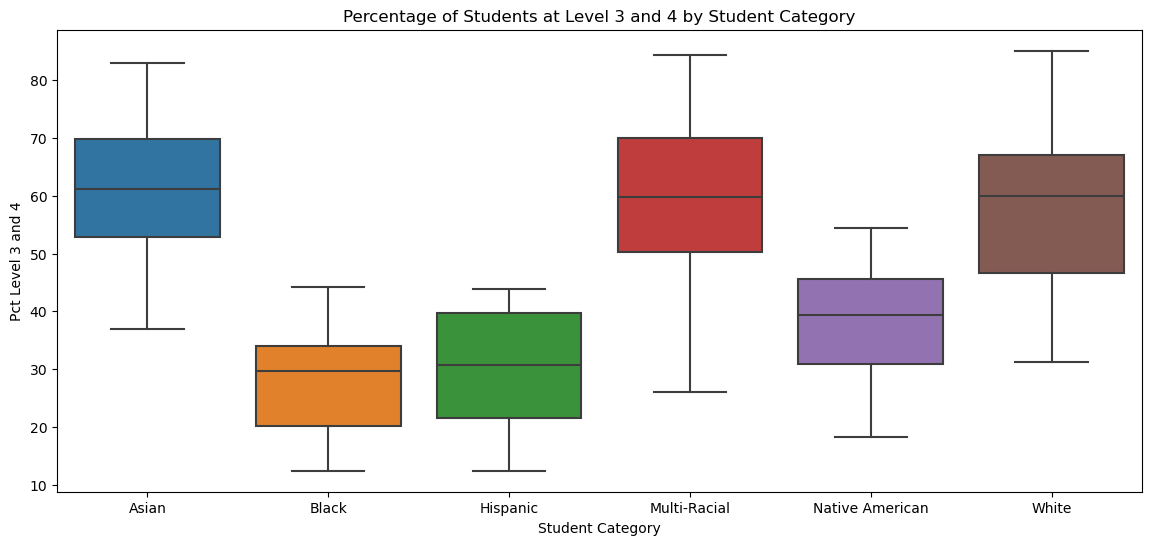

In [17]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='Student Category', y='Pct Level 3 and 4', data=df)
plt.title('Percentage of Students at Level 3 and 4 by Student Category')
plt.xlabel('Student Category')
plt.ylabel('Pct Level 3 and 4')
plt.show()

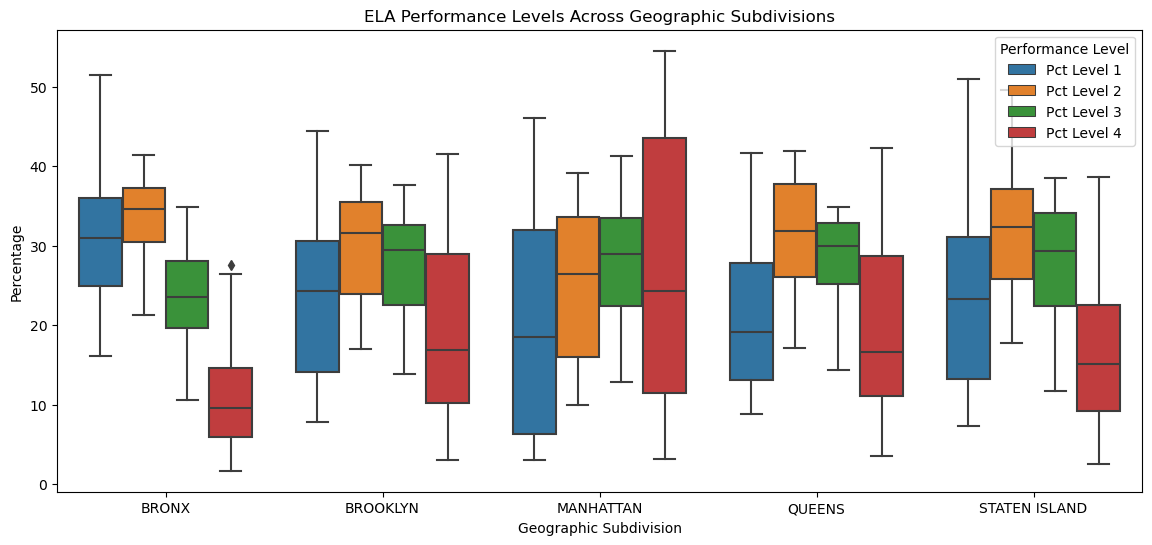

In [33]:
performance_levels = ['Pct Level 1', 'Pct Level 2', 'Pct Level 3', 'Pct Level 4']

df_melt = df.melt(id_vars=['Geographic Subdivision'], value_vars=performance_levels, var_name='Performance Level', value_name='Percentage')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Geographic Subdivision', y='Percentage', hue='Performance Level', data=df_melt)
plt.title('ELA Performance Levels Across Geographic Subdivisions')
plt.xlabel('Geographic Subdivision')
plt.ylabel('Percentage')
plt.legend(title='Performance Level')
plt.show()

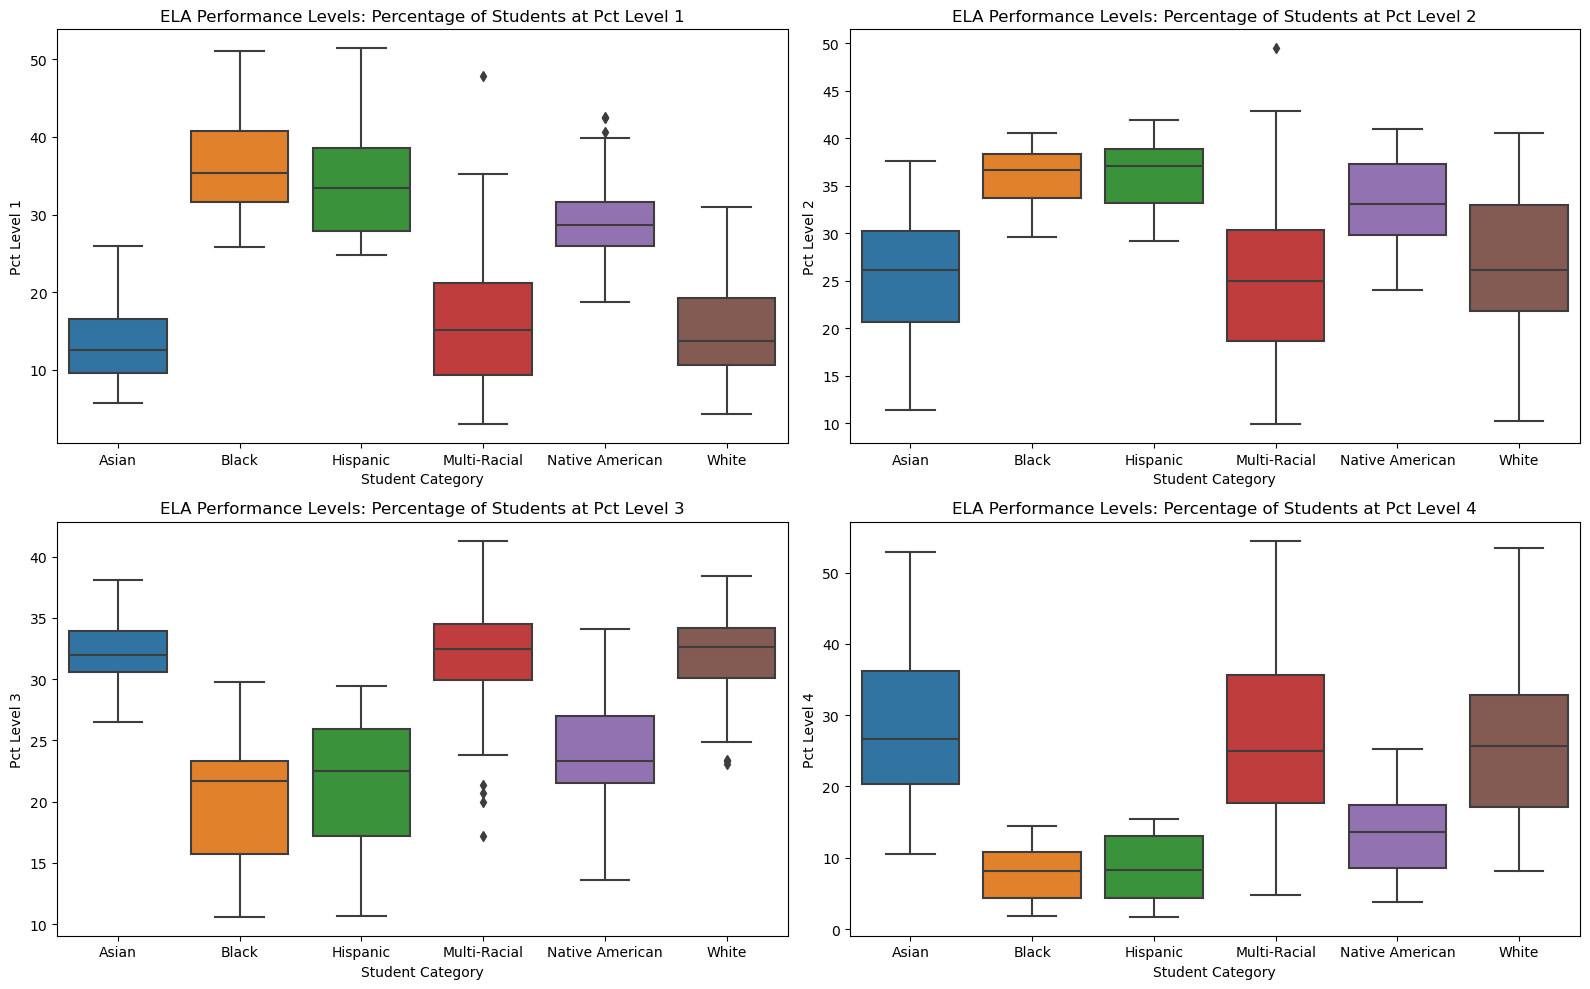

In [32]:
plt.figure(figsize=(16, 10))

for i, level in enumerate(performance_levels, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Student Category', y=level, data=df)
    plt.title(f'ELA Performance Levels: Percentage of Students at {level}')
    plt.xlabel('Student Category')
    plt.ylabel(f'{level}')

plt.tight_layout()
plt.show()

In [20]:
df_math = pd.read_csv("../data/Math_Test_Results_2013-2023_20240512.csv")

C:\Users\Michael\AppData\Local\Temp\ipykernel_2364\3054837522.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_math = pd.read_csv("../data/Math_Test_Results_2013-2023_20240512.csv")


In [21]:
df_math = df_math[~df_math['Student Category'].isin(removing_values)]
df_math = df_math[~df_math['Report Category'].isin(removing_values)]

In [22]:
df_math['Student Category'].unique()

array(['Asian', 'Black', 'Hispanic', 'Multi-Racial', 'Native American',
       'White'], dtype=object)

In [23]:
df_math.drop(columns=['Report Category','School Name','Num Level 1','Num Level 2','Num Level 3','Num Level 4','Num Level 3 and 4'], inplace=True)

In [24]:
df_math = df_math[
    (df_math['Grade'] == 'All Grades')
].copy()

In [25]:
columns_to_convert = [
    "Mean Scale Score",
    "Pct Level 1",
    "Pct Level 2",
    "Pct Level 3",
    "Pct Level 4",
    "Pct Level 3 and 4"
]

df_math[columns_to_convert] = df_math[columns_to_convert].apply(pd.to_numeric, errors='coerce')

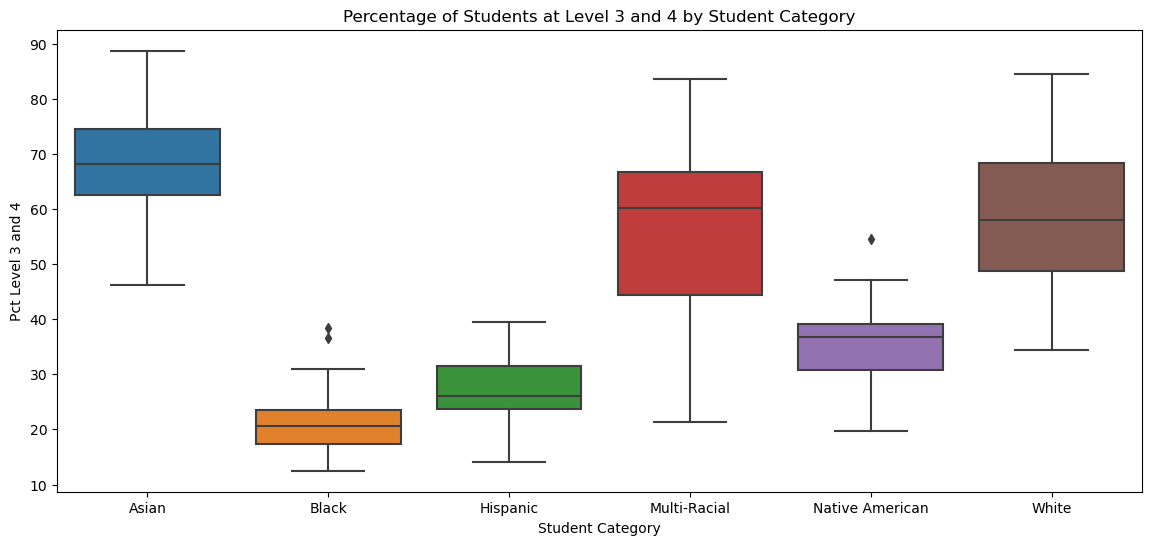

In [26]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='Student Category', y='Pct Level 3 and 4', data=df_math)
plt.title('Percentage of Students at Level 3 and 4 by Student Category')
plt.xlabel('Student Category')
plt.ylabel('Pct Level 3 and 4')
plt.show()

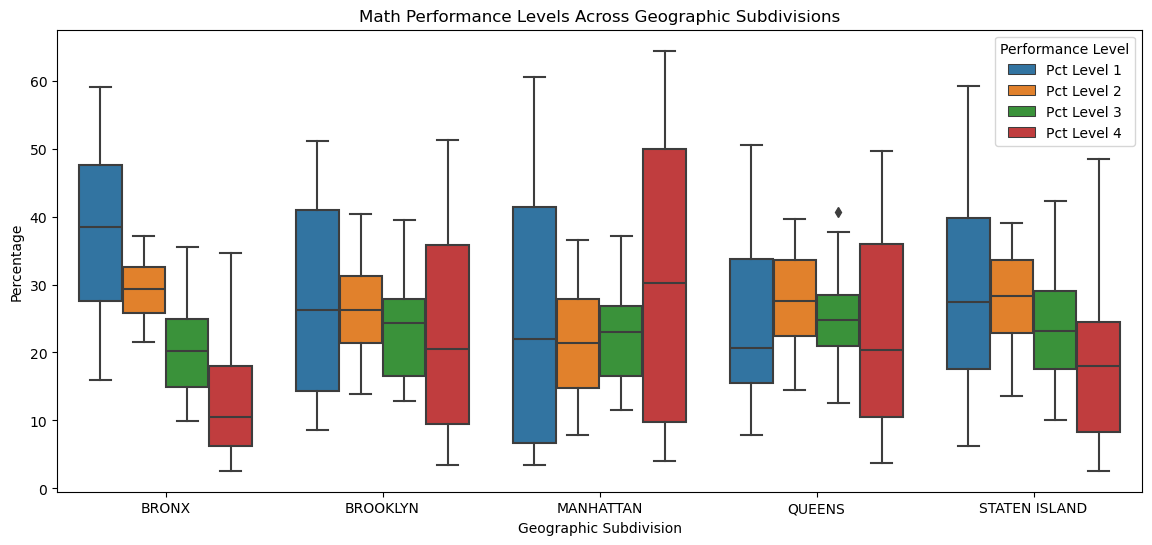

In [29]:
performance_levels = ['Pct Level 1', 'Pct Level 2', 'Pct Level 3', 'Pct Level 4']
df_math_melt = df_math.melt(id_vars=['Geographic Subdivision'], value_vars=performance_levels, var_name='Performance Level', value_name='Percentage')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Geographic Subdivision', y='Percentage', hue='Performance Level', data=df_math_melt)
plt.title('Math Performance Levels Across Geographic Subdivisions')
plt.xlabel('Geographic Subdivision')
plt.ylabel('Percentage')
plt.legend(title='Performance Level')
plt.show()

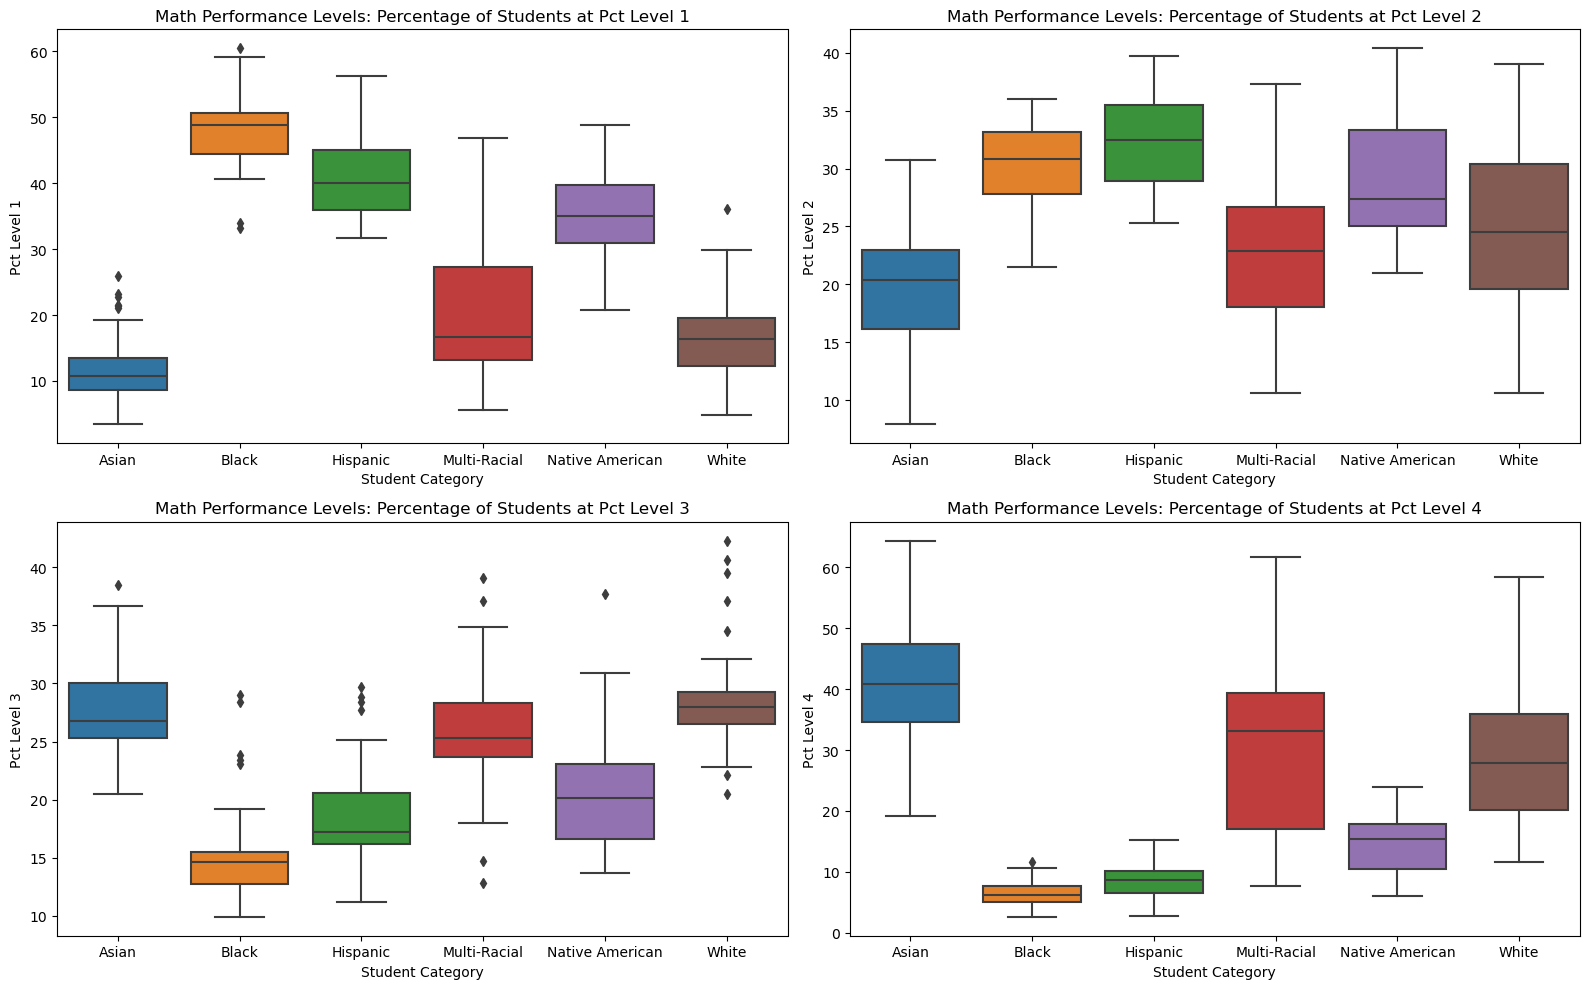

In [31]:
plt.figure(figsize=(16, 10))

for i, level in enumerate(performance_levels, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Student Category', y=level, data=df_math)
    plt.title(f'Math Performance Levels: Percentage of Students at {level}')
    plt.xlabel('Student Category')
    plt.ylabel(f'{level}')

plt.tight_layout()
plt.show()

In [39]:
# adding 'Subject' column
df_math['Subject'] = 'Math'
df['Subject'] = 'ELA'


In [42]:
ethnicity_results = pd.concat([df, df_math], ignore_index=True)

In [43]:
ethnicity_results

,Geographic Subdivision,Grade,Year,Student Category,Number Tested,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4,Subject
0,BRONX,All Grades,2023,Asian,3336,454,16.1,22.7,34.8,26.4,61.2,ELA
1,BRONX,All Grades,2023,Black,15057,441,33.6,30.9,25.7,9.8,35.5,ELA
2,BRONX,All Grades,2023,Hispanic,42276,440,34.4,31.1,25.1,9.4,34.5,ELA
3,BRONX,All Grades,2023,Multi-Racial,361,448,27.4,21.3,29.6,21.6,51.2,ELA
4,BRONX,All Grades,2023,Native American,644,444,28.6,28.7,28.9,13.8,42.7,ELA
...,...,...,...,...,...,...,...,...,...,...,...,...
535,STATEN ISLAND,All Grades,2013,Black,3567,280,56.8,30.7,10.0,2.6,12.5,Math
536,STATEN ISLAND,All Grades,2013,Hispanic,6593,289,43.9,37.6,14.3,4.2,18.5,Math
537,STATEN ISLAND,All Grades,2013,Multi-Racial,110,303,27.3,37.3,20.9,14.5,35.5,Math
538,STATEN ISLAND,All Grades,2013,Native American,117,300,30.8,38.5,23.1,7.7,30.8,Math


In [44]:
ethnicity_results.to_csv('ethnicity_results.csv', index=False)